In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
cosmetic_train = pd.read_csv("/kaggle/input/vseros-data/cosmetic_train.tsv", sep="\t")
cosmetic_val = pd.read_csv("/kaggle/input/vseros-data/cosmetic_val.tsv", sep="\t")

super_train = pd.read_csv("/kaggle/input/vseros-data/supermarket_train.tsv", sep="\t")
super_val = pd.read_csv("/kaggle/input/vseros-data/supermarket_val.tsv", sep="\t")

In [105]:
cosmetic_target = pd.read_csv("/kaggle/input/vseros-data/cosmetic_val_target.tsv", sep="\t") \
    .drop_duplicates() \
    .reset_index(drop=True)
super_target = pd.read_csv("/kaggle/input/vseros-data/supermarket_val_target.tsv", sep="\t") \
    .drop_duplicates() \
    .reset_index(drop=True)

In [106]:
cosmetic_target["receipt_id"].value_counts()

receipt_id
14116991683    1
13707649618    1
13683400497    1
13683097381    1
13681905755    1
              ..
9616414120     1
9588861991     1
9586639299     1
9579456638     1
16203517292    1
Name: count, Length: 22761, dtype: int64

In [107]:
cosmetic_target[cosmetic_target["receipt_id"] == 14116991683]

,receipt_id,item_id
0,14116991683,200423


In [108]:
cosmetic_val[cosmetic_val["receipt_id"] == 14116991683]

,device_id,receipt_id,item_id,local_date,name,price,quantity
0,356645110209741,14116991683,200113,2023-02-15 15:14:08,"Карандаш для губ Lip Liner Letique Makeup, 0,2...",990.0,1


In [109]:
super_target["receipt_id"].value_counts()

receipt_id
13014464124    1
15461927724    1
15462050687    1
15462181657    1
15462365745    1
              ..
13351050690    1
13354010600    1
13354851231    1
13354866665    1
10117361561    1
Name: count, Length: 54432, dtype: int64

In [117]:
super_target[super_target["receipt_id"] == 13351050690]

,receipt_id,item_id
18147,13351050690,110497


In [118]:
super_val[super_val["receipt_id"] == 13351050690]

,device_id,receipt_id,item_id,local_date,name,price,quantity
59092,352398080550397,13351050690,115873,2022-11-21 12:16:31,Хлеб Дарницкий 600гр нарезка м/уп. /Пореченски...,43.0,1.0


In [119]:
super_val.loc[super_val["item_id"] == 110497, "name"].iloc[0]

'Печенье Овсяное сахарное /Пореченский х/з/'

# Cosmetic

In [10]:
cosmetic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223908 entries, 0 to 223907
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   device_id   223908 non-null  int64  
 1   receipt_id  223908 non-null  int64  
 2   item_id     223908 non-null  int64  
 3   local_date  223908 non-null  object 
 4   name        223908 non-null  object 
 5   price       223908 non-null  float64
 6   quantity    223908 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 12.0+ MB


In [11]:
cosmetic_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51650 entries, 0 to 51649
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   device_id   51650 non-null  int64  
 1   receipt_id  51650 non-null  int64  
 2   item_id     51650 non-null  int64  
 3   local_date  51650 non-null  object 
 4   name        51650 non-null  object 
 5   price       51650 non-null  float64
 6   quantity    51650 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.8+ MB


In [18]:
cosmetic_train["device_id"].nunique(), cosmetic_val["device_id"].nunique()

(30, 30)

In [20]:
#  Девайсы пересекаются на 100% 
cosmetic_train["device_id"].isin(cosmetic_val["device_id"]).mean()

1.0

In [22]:
#  Чеки не пересекаются с валидацией
cosmetic_train["receipt_id"].isin(cosmetic_val["receipt_id"]).mean()

0.0

In [25]:
# Не все товары из валидации есть на трейне
cosmetic_val["item_id"].isin(cosmetic_train["item_id"]).mean()

0.9998838334946757

In [26]:
# Те товары, что не пересекаются
cosmetic_val[~cosmetic_val["item_id"].isin(cosmetic_train["item_id"])]

,device_id,receipt_id,item_id,local_date,name,price,quantity
7358,352398085964585,10647147047,200636,2022-02-14 21:06:51,Хайлайтер-стик для тела и лица Shimmer body an...,1990.0,1
13854,352398088070463,9931561173,200379,2021-11-24 18:21:59,"Охлаждающий гель CRYO SCULPTOR GEL, 200 мл",1393.0,1
18907,352398088914876,10508913939,200496,2022-01-29 16:33:43,"Скраб для тела CHOCO MINT , 250 г",990.0,1
22271,352398089986709,9202906046,200443,2021-09-08 14:50:26,"САШЕ Обертывание ""Корица-апельсин"", 10 мл",0.0,1
22297,352398089986709,9253212881,200443,2021-09-13 14:31:50,"САШЕ Обертывание ""Корица-апельсин"", 10 мл",0.0,1
22719,356645110583194,11455667100,200304,2022-05-14 14:19:09,Мусс для тела,1390.0,1


In [38]:
# Чек, что нет дублей по наименованиям
assert cosmetic_train.groupby(["name"])["item_id"].nunique().max() == 1
assert cosmetic_val.groupby(["name"])["item_id"].nunique().max() == 1

In [41]:
cosmetic_train.groupby(["item_id"])["price"].nunique().describe()

count    667.000000
mean      18.287856
std       28.905270
min        1.000000
25%        2.000000
50%        4.000000
75%       23.500000
max      156.000000
Name: price, dtype: float64

In [42]:
cosmetic_val.groupby(["item_id"])["price"].nunique().describe()

count    586.000000
mean       8.703072
std       11.256780
min        1.000000
25%        1.000000
50%        3.000000
75%       13.000000
max       71.000000
Name: price, dtype: float64

In [47]:
# Проверка товаров, по которым много разной стоимости (видимо динамическое ЦО воркает на ура)
# + есть прайсы по 0 рублей - наверное это подарочные карты / бонусы
cosmetic_train[cosmetic_train["item_id"].isin(cosmetic_train.groupby(["item_id"])["price"].nunique().where(lambda x: x > 100).dropna().index)] \
    .sort_values("item_id")

,device_id,receipt_id,item_id,local_date,name,price,quantity
185961,356645110714724,14841473822,200049,2023-04-29 18:38:36,Бальзам для губ МОЛОЧНЫЙ ШОКОЛАД LIP BUTTER MI...,0.0,1
167863,356645110691534,13584612604,200049,2022-12-16 23:47:29,Бальзам для губ МОЛОЧНЫЙ ШОКОЛАД LIP BUTTER MI...,690.0,1
135288,356645110652080,12928479839,200049,2022-10-07 16:24:46,Бальзам для губ МОЛОЧНЫЙ ШОКОЛАД LIP BUTTER MI...,690.0,1
15539,352398083991747,13638087074,200049,2022-12-22 18:36:52,Бальзам для губ МОЛОЧНЫЙ ШОКОЛАД LIP BUTTER MI...,690.0,1
202997,356645110747963,15254722883,200049,2023-06-06 21:31:40,Бальзам для губ МОЛОЧНЫЙ ШОКОЛАД LIP BUTTER MI...,657.0,1
...,...,...,...,...,...,...,...
165951,356645110691534,12036540177,200629,2022-07-10 14:49:00,"Увлажняющий крем-гель для лица HYDROLIFTING, 5...",1490.0,1
144797,356645110653351,12814822831,200629,2022-09-25 16:56:58,"Увлажняющий крем-гель для лица HYDROLIFTING, 5...",1490.0,1
94299,356645110492388,13721533614,200629,2022-12-30 17:25:49,"Увлажняющий крем-гель для лица HYDROLIFTING, 5...",1490.0,1
211881,356645110823384,11891993961,200629,2022-06-26 13:58:20,"Увлажняющий крем-гель для лица HYDROLIFTING, 5...",1490.0,1


In [50]:
cosmetic_train["price"].max(), cosmetic_val["price"].max()

(7023.0, 7023.0)

In [51]:
# Данные вырваны с 1го периода времени
cosmetic_train["local_date"].agg(["min", "max"])

min    2021-09-01 10:08:23
max    2023-08-31 22:05:02
Name: local_date, dtype: object

In [52]:
cosmetic_val["local_date"].agg(["min", "max"])

min    2021-09-01 14:05:09
max    2023-08-31 22:04:39
Name: local_date, dtype: object

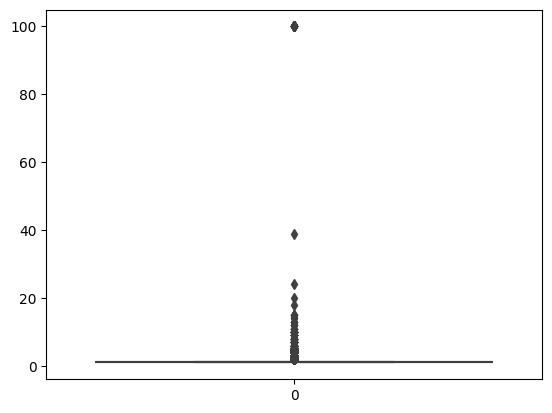

In [71]:
sns.boxplot(cosmetic_train["quantity"])
plt.show()

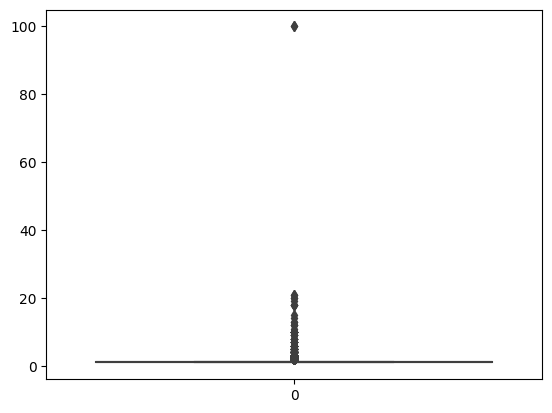

In [72]:
sns.boxplot(cosmetic_val["quantity"])
plt.show()

In [75]:
# Есть какие-то выбросы по числу купленных скю, как будто оптовые закупки
# Не уверена, что их стоит юзать 
cosmetic_train[cosmetic_train["quantity"] == 100]

,device_id,receipt_id,item_id,local_date,name,price,quantity
21329,352398085964585,9309562184,200389,2021-09-18 21:30:22,Пакет бумажный,0.00,100
23682,352398085964585,9684618531,200388,2021-10-27 19:02:13,Пакет ПВД,0.00,100
28180,356645110248293,12549332571,200543,2022-08-29 18:51:42,"Скраб какао, 250 г (товар)",0.00,100
34735,356645110248293,13739681560,200391,2023-01-02 21:31:41,Пакет бумажный подарочный Сакура (ТОВАР),0.01,100
50272,356645110250653,14266654768,200641,2023-03-03 16:50:00,"Шампунь для волос WINTERBERRY, 100 мл",0.00,100
56283,352398088070463,9672100997,200393,2021-10-26 14:42:44,Пакеты бумажные,0.00,100
60033,352398088070463,10151750143,200393,2021-12-18 18:50:33,Пакеты бумажные,0.00,100
60290,352398088070463,10224968117,200393,2021-12-26 18:03:09,Пакеты бумажные,0.00,100
64524,356645110252402,13242454134,200528,2022-11-09 19:00:34,"Скраб для тела WILD RASPBERRY, 50 мл",0.00,100
65091,356645110252402,13657798038,200070,2022-12-24 18:04:49,"Гель для душа Candy Raspberry, 100 мл",0.00,100


In [74]:
cosmetic_val[cosmetic_val["quantity"] == 100]

,device_id,receipt_id,item_id,local_date,name,price,quantity
22669,356645110583194,11206334474,200144,2022-04-17 15:58:57,"Коробка подарочная ""Letique"" (товар)",0.0,100
49519,356645110824226,13258765656,200070,2022-11-11 17:58:10,"Гель для душа Candy Raspberry, 100 мл",0.0,100


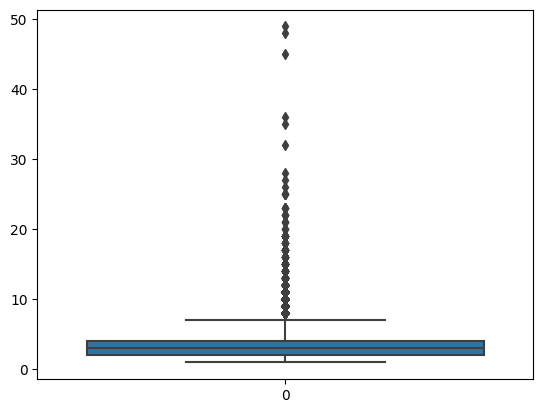

In [83]:
# Есть жирные корзины, где набирали много разных позиций
sns.boxplot(cosmetic_train.groupby(["receipt_id"])["item_id"].nunique().values)
plt.show()

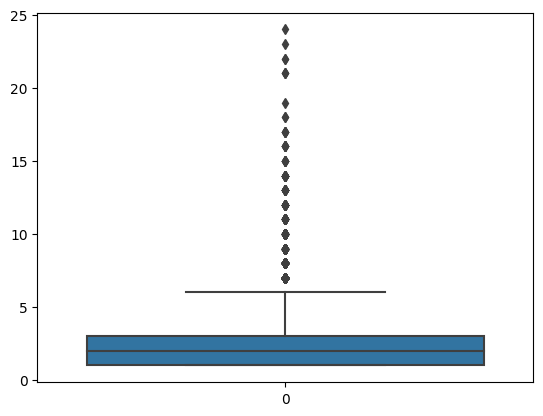

In [84]:
sns.boxplot(cosmetic_val.groupby(["receipt_id"])["item_id"].nunique().values)
plt.show()

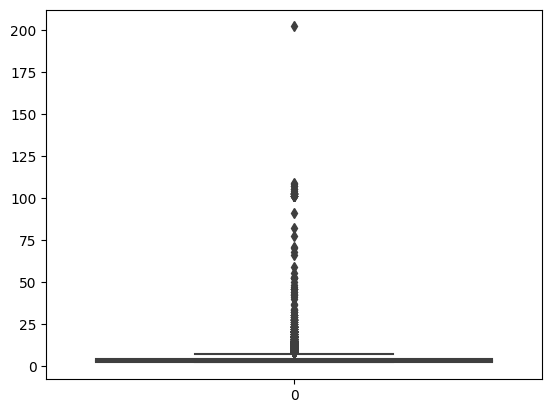

In [85]:
# Это наверное как раз те, кто брали оптом
sns.boxplot(cosmetic_train.groupby(["receipt_id"])["quantity"].sum().values)
plt.show()

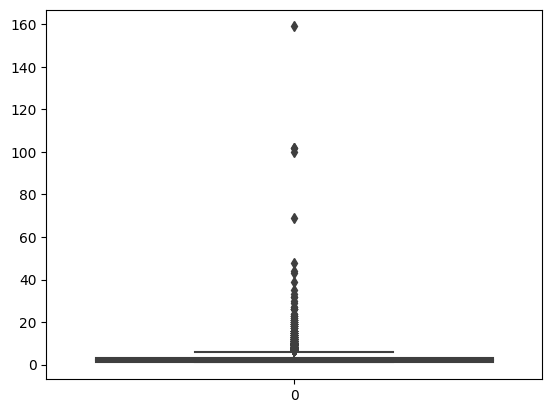

In [86]:
# Это наверное как раз те, кто брали оптом
sns.boxplot(cosmetic_val.groupby(["receipt_id"])["quantity"].sum().values)
plt.show()

# Super

In [54]:
super_train.info()

,device_id,receipt_id,item_id,local_date,name,price,quantity
0,352398080550058,13014665572,104821,2022-10-16 14:38:01,Картофель /новый урожай/Россия/,31.9,28.45
1,352398080550058,13014665572,107726,2022-10-16 14:38:01,Молоко Станичное 3.2% 1.0л ультрапастеризованн...,89.0,1.00
2,352398080550058,13014716101,100671,2022-10-16 14:42:06,Вафли Коламбина /телевизор/Кузнецов/,367.0,2.00
3,352398080550058,13014716101,104645,2022-10-16 14:42:06,К-ты Хо-хо-чу глаз.солен.карамель /Невск.конди...,334.0,1.00
4,352398080550058,13015069818,107708,2022-10-16 15:11:39,Молоко Молочный гостинец 3.2% 930гр ультрапаст...,89.0,1.00
...,...,...,...,...,...,...,...
696782,352398080043187,10117495751,101631,2021-12-15 12:49:19,Газета Курьер Псков-Великие Луки,26.0,1.00
696783,352398080043187,10117495751,101633,2021-12-15 12:49:19,Газета Стерх-Луки,51.0,1.00
696784,352398080043187,10117495751,111409,2021-12-15 12:49:19,Пирожное бискв.с масл.кремом 80гр /ПО Переслег...,37.0,4.00
696785,352398080043187,10117495751,100619,2021-12-15 12:49:19,Ватрушка с творогом сдобная 140гр м/уп. /Пореч...,39.5,1.00


In [13]:
super_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172658 entries, 0 to 172657
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   device_id    172658 non-null  int64  
 1   receipt_id   172658 non-null  int64  
 2   item_id      172658 non-null  int64  
 3   server_date  172658 non-null  object 
 4   local_date   172658 non-null  object 
 5   name         172658 non-null  object 
 6   price        172658 non-null  float64
 7   quantity     172658 non-null  float64
 8   my_ckecker   0 non-null       float64
dtypes: float64(3), int64(3), object(3)
memory usage: 11.9+ MB


In [15]:
super_train.drop(["my_ckecker", "server_date"], axis=1, inplace=True)
super_val.drop(["my_ckecker", "server_date"], axis=1, inplace=True)

In [55]:
super_train["device_id"].nunique(), super_val["device_id"].nunique()

(25, 25)

In [57]:
#  Девайсы пересекаются на 100% 
super_train["device_id"].isin(super_val["device_id"]).mean()

1.0

In [58]:
#  Чеки не пересекаются с валидацией
super_train["receipt_id"].isin(super_val["receipt_id"]).mean()

0.0

In [59]:
# Не все товары из валидации есть на трейне
super_val["item_id"].isin(super_train["item_id"]).mean()

0.9946541718310186

In [60]:
super_val[~super_val["item_id"].isin(super_train["item_id"])]

,device_id,receipt_id,item_id,local_date,name,price,quantity
79,352398080550058,13038880190,116230,2022-10-19 09:26:19,Чайник Матрена МА-001 1500Вт1.8л.сталь+голуб.,800.0,1.0
432,352398080550058,13689489069,116110,2022-12-28 09:48:54,Чай Иван-чай 40гр кипрей ферментированный в гр...,90.0,1.0
575,352398080550058,13738319071,108541,2023-01-02 15:59:49,Н-р конфет Цветы 240гр Белый букет /ООО Сергие...,300.0,1.0
811,352398080550058,14078173129,115780,2023-02-11 12:29:40,Фонарь Яркий Луч Т1 алюм.корп.светодиод 0.5W 1хАА,160.0,1.0
1083,352398080550058,14439405466,107422,2023-03-21 15:23:44,Машина инерцион.Glass гонка H&R в ассорт.15см ...,214.0,1.0
...,...,...,...,...,...,...,...
172279,352398080043187,9726119578,115902,2021-11-01 15:10:16,Хлебцы Бежицкие Постные 170гр м/уп. /Бежицкий ...,35.0,1.0
172331,352398080043187,9744157129,107896,2021-11-03 16:41:34,Морож.Калинов мост Ваше лакомство 80гр пломбир...,61.0,3.0
172499,352398080043187,10065517174,111781,2021-12-09 17:19:38,Пр-ки OLA! Ultra Normal 10шт нежная роза 1252,104.0,1.0
172533,352398080043187,10074233194,116237,2021-12-10 15:53:20,Чайник Матрена МА-007 1.8л стекло.черный,1450.0,1.0


In [61]:
super_train["price"].max(), super_val["price"].max()

(16100.0, 5328.0)

In [62]:
super_train["local_date"].agg(["min", "max"])

min    2021-09-01 08:58:36
max    2023-08-31 19:48:28
Name: local_date, dtype: object

In [63]:
super_val["local_date"].agg(["min", "max"])

min    2021-09-01 09:11:32
max    2023-08-31 19:21:01
Name: local_date, dtype: object

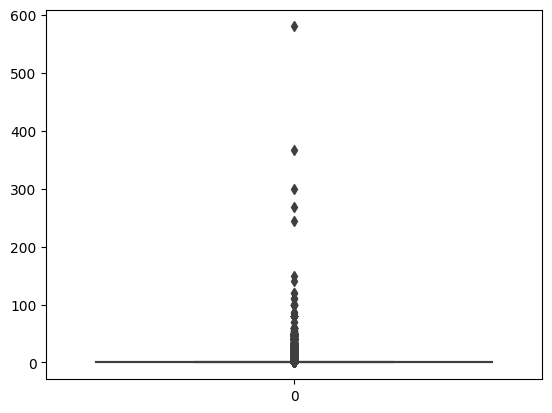

In [87]:
sns.boxplot(super_train["quantity"])
plt.show()

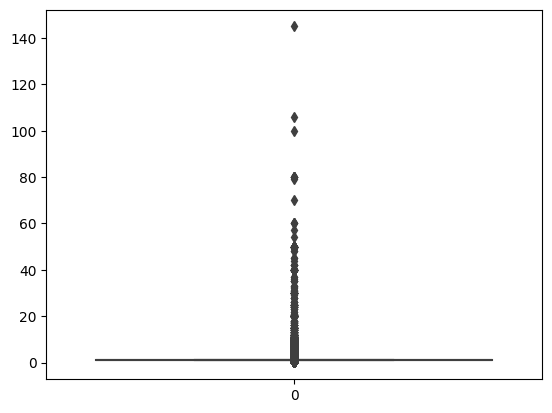

In [88]:
sns.boxplot(super_val["quantity"])
plt.show()

In [92]:
super_train[super_train["quantity"] > 200]

,device_id,receipt_id,item_id,local_date,name,price,quantity
39886,352398080391545,9689693430,101800,2021-10-28 12:47:36,Горбуша с/г н/р с/м /ООО РК Крутогоровское Кам...,1.22,245.0
39984,352398080391545,9702200170,103500,2021-10-29 16:24:12,К-са Венгерская п/к 350гр (кольцо) ГОСТ н/о в/...,0.41,580.0
269145,352398080098702,12303547697,106721,2022-08-05 16:53:54,Лопатка свиная б/к без рульки с/м в/уп. /ООО Т...,4.42,269.0
401248,352398080098702,9185037730,114133,2021-09-06 18:29:38,Сосиски Баварские 420гр /Стародворские колбасы/,0.65,299.0
401249,352398080098702,9185037730,103761,2021-09-06 18:29:38,К-са Русская по-Стародворски вар./Стародворски...,0.90,366.0


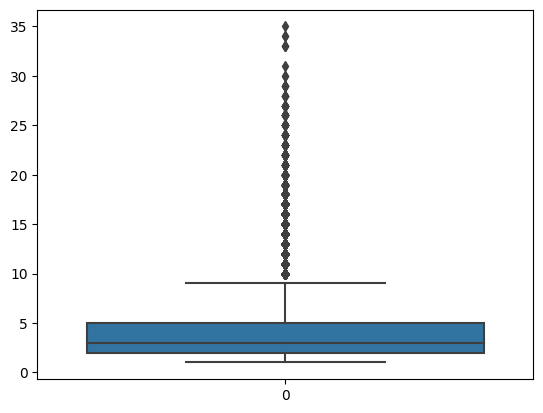

In [93]:
sns.boxplot(super_train.groupby(["receipt_id"])["item_id"].nunique().values)
plt.show()

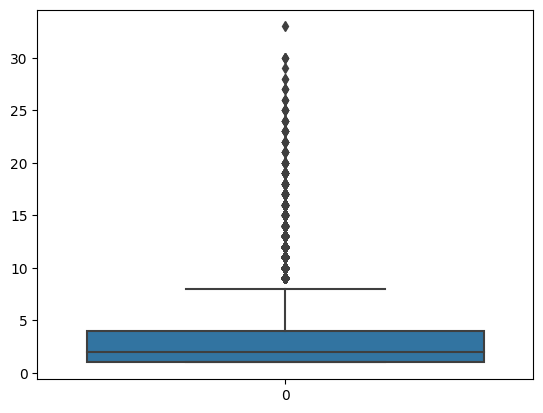

In [94]:
sns.boxplot(super_val.groupby(["receipt_id"])["item_id"].nunique().values)
plt.show()

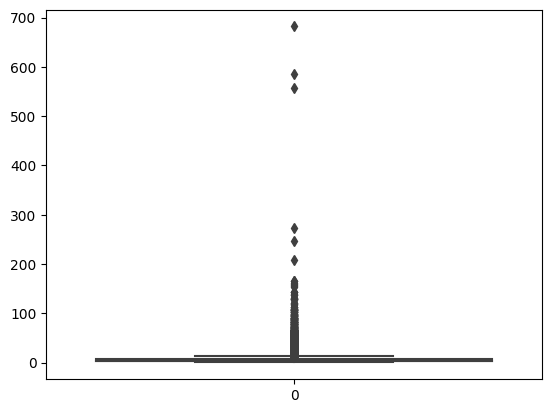

In [95]:
sns.boxplot(super_train.groupby(["receipt_id"])["quantity"].sum().values)
plt.show()

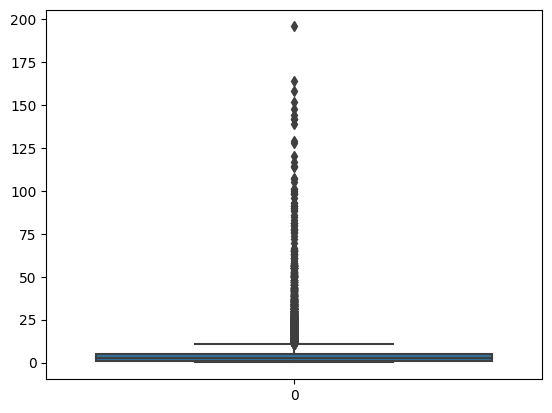

In [96]:
sns.boxplot(super_val.groupby(["receipt_id"])["quantity"].sum().values)
plt.show()